In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_6226/1526571537.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Dataset 2020 

In [2]:
data_2020 = pd.read_csv('/Users/haddock_ana/Ironhack/5.3 - Series de tiempo/Datasets/flujo-vehicular-2020.csv', sep =',')
data_2020.head(3)

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1


In [3]:
data_2020.rename(columns = {'fecha':'Año de Fecha Operativa', 'hora_fin':'Hora HH',
                     'forma_pago':'Tipo Cobro', 'observacion':'Observacion', 'cantidad_pasos': 'Pasos',
                      'estacion':'ID Peaje', 'sentido': 'Sentido', 'tipo_vehiculo': 'Cat Cobrada' }, inplace = True) 


In [4]:
data_2020 = data_2020.drop(['periodo', 'mes', 'dia', 'dia_fecha', 'hora_inicio'], axis=1)

In [5]:
data_2020.head()

,Año de Fecha Operativa,Hora HH,ID Peaje,Cat Cobrada,Tipo Cobro,Observacion,Sentido,Pasos
0,2020-01-01,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020-01-01,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020-01-01,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020-01-01,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020-01-01,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


In [6]:
data_2020 = data_2020[['Año de Fecha Operativa', 'Hora HH', 'Cat Cobrada', 'ID Peaje', 'Observacion', 'Sentido', 'Tipo Cobro', 'Pasos']]


In [7]:
data_2020.tail(2)

,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
678733,2020-03-31,0,Pesados 6 Ejes,PB4,Tag - PosPago,Centro,Tag,6
678734,2020-03-31,0,Pesados 6 Ejes,PB4,Violación - Normal,Centro,Violación,1


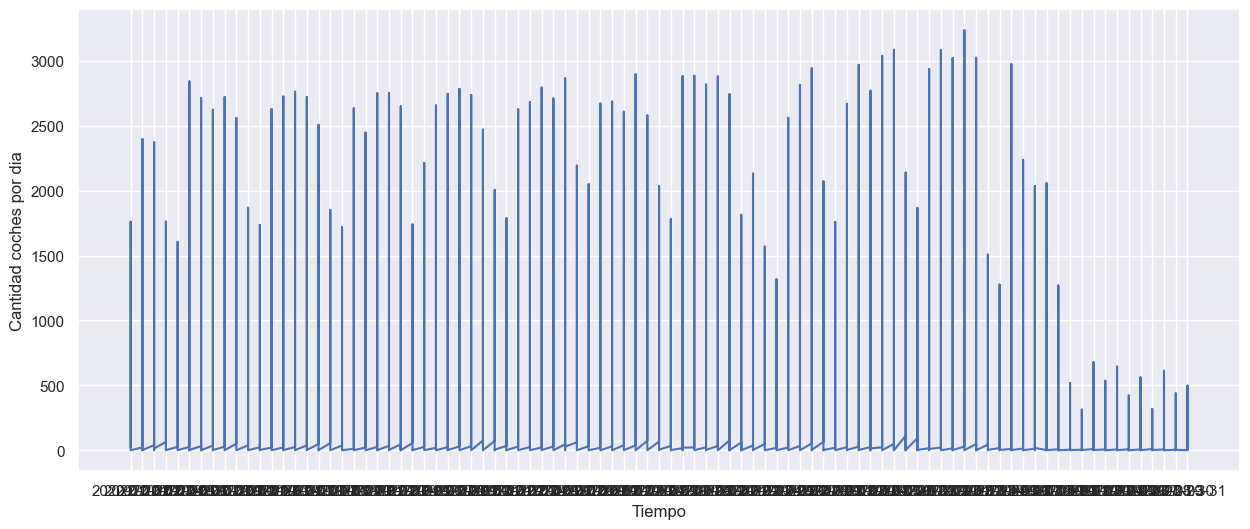

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(data_2020['Año de Fecha Operativa'], data_2020['Pasos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad coches por dia')
plt.show()

# Dataset 2021

In [9]:
data_2021 = pd.read_csv('/Users/haddock_ana/Ironhack/5.3 - Series de tiempo/lab-py-5-3/Data/flujo-vehicular-2021.csv', sep =',')
data_2021.head(3)

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_6226/4174975573.py:1: DtypeWarning: Columns (0,2,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('/Users/haddock_ana/Ironhack/5.3 - Series de tiempo/lab-py-5-3/Data/flujo-vehicular-2021.csv', sep =',')


,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1


In [10]:
month_map = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}
data_2021['Mes de Fecha Operativa'] = data_2021['Mes de Fecha Operativa'].map(month_map)

In [11]:
data_2021['Mes de Fecha Operativa'] = pd.to_datetime(data_2021['Mes de Fecha Operativa'])
data_2021['Mes de Fecha Operativa'] = data_2021['Mes de Fecha Operativa'].astype(int)
data_2021 = data_2021.drop(data_2021.index[-1])

In [12]:
data_2021['Año de Fecha Operativa'] = data_2021.apply(lambda x:'%s/%s/%s' % (x['Día de Fecha Operativa'], x['Mes de Fecha Operativa'], x['Año de Fecha Operativa']), axis=1)

In [13]:
data_2021 = data_2021.drop(['Día de Fecha Operativa','Mes de Fecha Operativa'], axis=1)

In [14]:
data_2021 = data_2021[['Año de Fecha Operativa', 'Hora HH', 'Cat Cobrada', 'ID Peaje',
       'Observacion', 'Sentido', 'Tipo Cobro', 'Pasos']]

In [15]:
data_2021['Año de Fecha Operativa'] = pd.to_datetime(data_2021['Año de Fecha Operativa'], format='%d/%m/%Y', errors='coerce')
data_2021.head(3)

,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,2021-04-01,0,Auto,ALB,Efectivo,Provincia,Efectivo,7
1,2021-04-01,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,4
2,2021-04-01,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,1


In [16]:
data_2021.tail(5)

,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
3029361,2021-12-21,15,N/D,DEC,Violación - Vía Cerrada,Centro,Violación,2330
3029362,2021-12-21,15,N/D,DEL,Violación - Vía Cerrada,Provincia,Violación,1969
3029363,2021-12-21,15,N/D,ILL,Violación - Normal,Centro,Violación,3
3029364,2021-12-21,15,N/D,ILL,Violación - Vía Cerrada,Centro,Violación,2445
3029365,2021-12-21,15,N/D,ILL,Violación - Vía Cerrada,Provincia,Violación,3880


In [17]:
data_2021['Año de Fecha Operativa'] = pd.to_datetime(data_2021['Año de Fecha Operativa'], format='%d/%m/%Y', errors='coerce')

In [18]:
data_2021 = data_2021[data_2021['Pasos'] != '8.501.733']

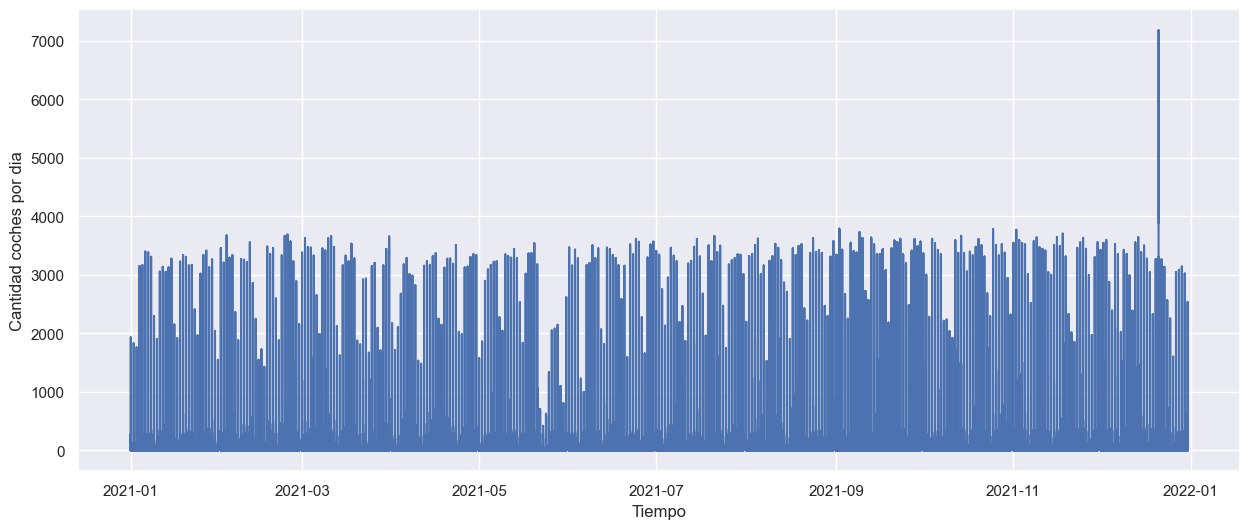

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(data_2021['Año de Fecha Operativa'], data_2021['Pasos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad coches por dia')
plt.show()

# Create the combined Dataset (2020 - 2021)

In [20]:
dataset = pd.concat([data_2020, data_2021])

In [21]:
dataset['Año de Fecha Operativa'] = pd.to_datetime(dataset['Año de Fecha Operativa'])
dataset['Año de Fecha Operativa'] = dataset['Año de Fecha Operativa'].dt.date

In [22]:
dataset

,Año de Fecha Operativa,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
0,2020-01-01,1,Auto,ALBERDI,Efectivo,Centro,Efectivo,24
1,2020-01-01,1,Auto,ALBERDI,Efectivo,Provincia,Efectivo,80
2,2020-01-01,1,Auto,ALBERDI,Paso en Infracción,Provincia,Rec.Deuda,1
3,2020-01-01,1,Auto,ALBERDI,Paso en infracción con Multa LPR,Centro,Rec.Deuda,1
4,2020-01-01,1,Auto,ALBERDI,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
...,...,...,...,...,...,...,...,...
3029361,2021-12-21,15,N/D,DEC,Violación - Vía Cerrada,Centro,Violación,2330
3029362,2021-12-21,15,N/D,DEL,Violación - Vía Cerrada,Provincia,Violación,1969
3029363,2021-12-21,15,N/D,ILL,Violación - Normal,Centro,Violación,3
3029364,2021-12-21,15,N/D,ILL,Violación - Vía Cerrada,Centro,Violación,2445


In [23]:
dataset['Año de Fecha Operativa'] = pd.to_datetime(dataset['Año de Fecha Operativa'])

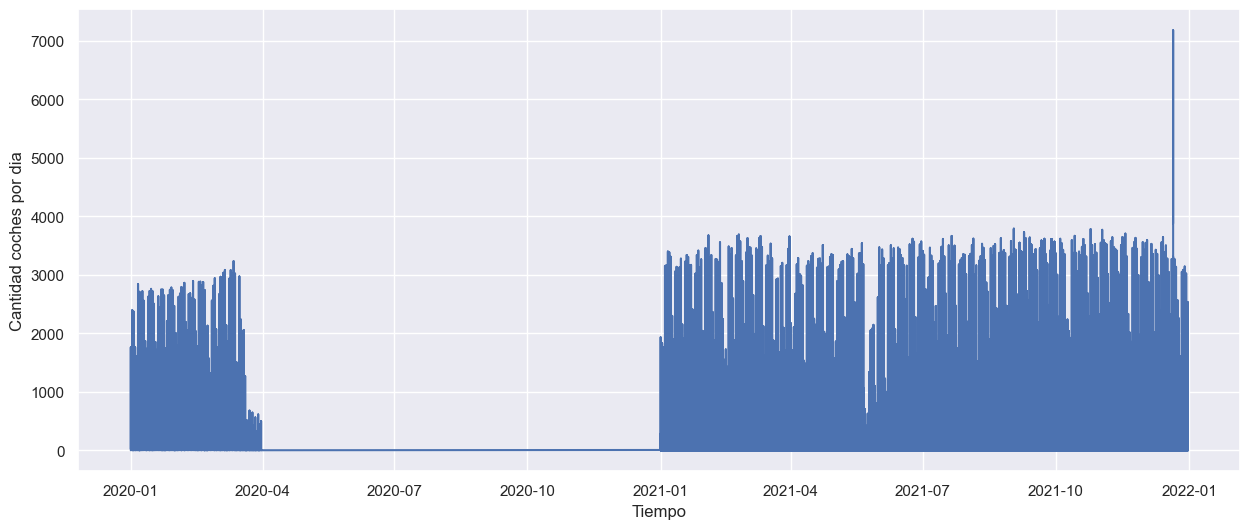

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(dataset['Año de Fecha Operativa'], dataset['Pasos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad coches por dia')
plt.show()

In [25]:
dataset.drop(columns=['Cat Cobrada','ID Peaje','Observacion','Sentido', 'Tipo Cobro'], inplace=True)

In [26]:
dataset

,Año de Fecha Operativa,Hora HH,Pasos
0,2020-01-01,1,24
1,2020-01-01,1,80
2,2020-01-01,1,1
3,2020-01-01,1,1
4,2020-01-01,1,1
...,...,...,...
3029361,2021-12-21,15,2330
3029362,2021-12-21,15,1969
3029363,2021-12-21,15,3
3029364,2021-12-21,15,2445


# Diario

In [40]:
dataset['Pasos'] = pd.to_numeric(dataset['Pasos'], errors='coerce')

In [44]:
diario = dataset.groupby(pd.Grouper(key='Año de Fecha Operativa', freq='D')).agg({'Pasos': 'sum'}).reset_index()


In [45]:
diario

,Año de Fecha Operativa,Pasos
0,2020-01-01,191034
1,2020-01-02,350026
2,2020-01-03,378523
3,2020-01-04,266216
4,2020-01-05,226755
...,...,...
726,2021-12-27,368706
727,2021-12-28,388601
728,2021-12-29,397415
729,2021-12-30,392465


# Semanal

In [46]:
semanal = diario.resample('W', on = 'Año de Fecha Operativa').sum()
#Tiramos la ultima semana porque esta muy incompleta
#semanal.drop(semanal.tail(1).index, inplace = True)
#semanal.drop(columns = ['dia','sentido','tipo_vehiculo',], inplace = True)
print(semanal.shape)
semanal.tail()

(105, 1)


,Pasos
Año de Fecha Operativa,
2021-12-05,2730841
2021-12-12,2657171
2021-12-19,2859063
2021-12-26,2468454
2022-01-02,1780730


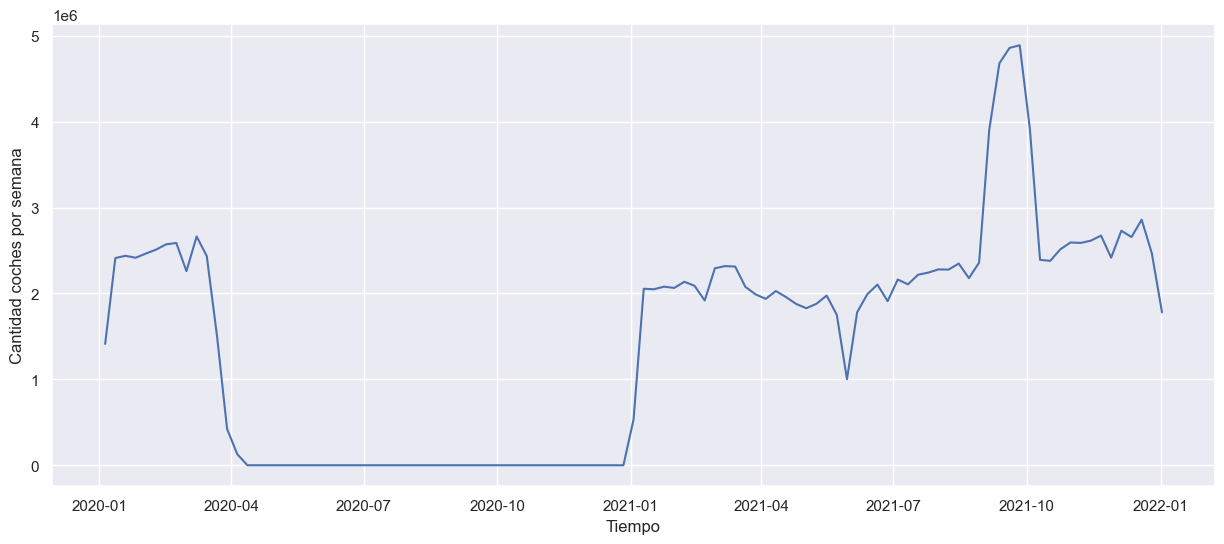

In [48]:
plt.figure(figsize=(15, 6))
plt.plot(semanal)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad coches por semana')
plt.show()

# Diario y Semanal

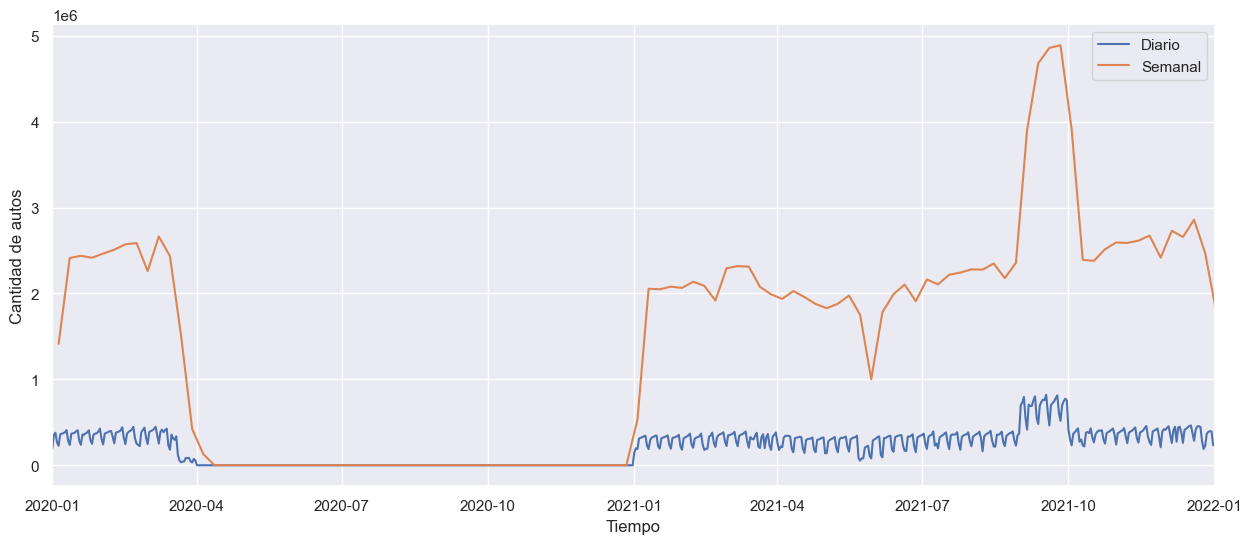

In [53]:
plt.figure(figsize = (15,6))
plt.plot(diario['Año de Fecha Operativa'], diario.Pasos, label = 'Diario')
plt.plot(semanal.index, semanal.Pasos, label = 'Semanal')
plt.xlim(datetime.date(2020,1,1), datetime.date(2022,1,1))
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.show()

# Forcast con Prophet

In [54]:
from prophet import Prophet

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
df = diario
df.rename(columns = {'Año de Fecha Operativa':'ds', 'Pasos':'y'}, inplace = True)
df

,ds,y
0,2020-01-01,191034
1,2020-01-02,350026
2,2020-01-03,378523
3,2020-01-04,266216
4,2020-01-05,226755
...,...,...
726,2021-12-27,368706
727,2021-12-28,388601
728,2021-12-29,397415
729,2021-12-30,392465


In [64]:
m = Prophet()
m.fit(df)

16:43:12 - cmdstanpy - INFO - Chain [1] start processing
16:43:12 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1091,2022-12-27
1092,2022-12-28
1093,2022-12-29
1094,2022-12-30
1095,2022-12-31


/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


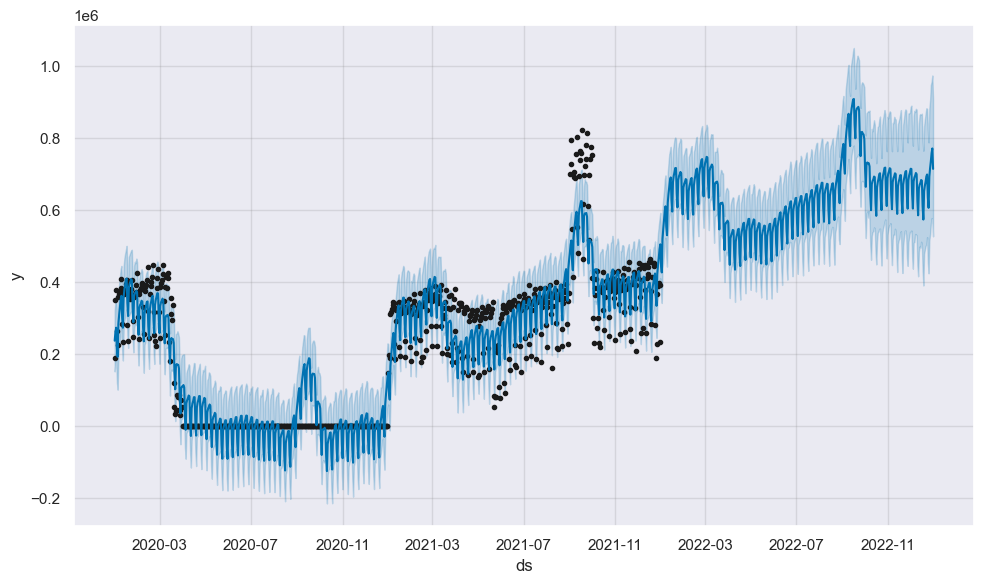

In [66]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

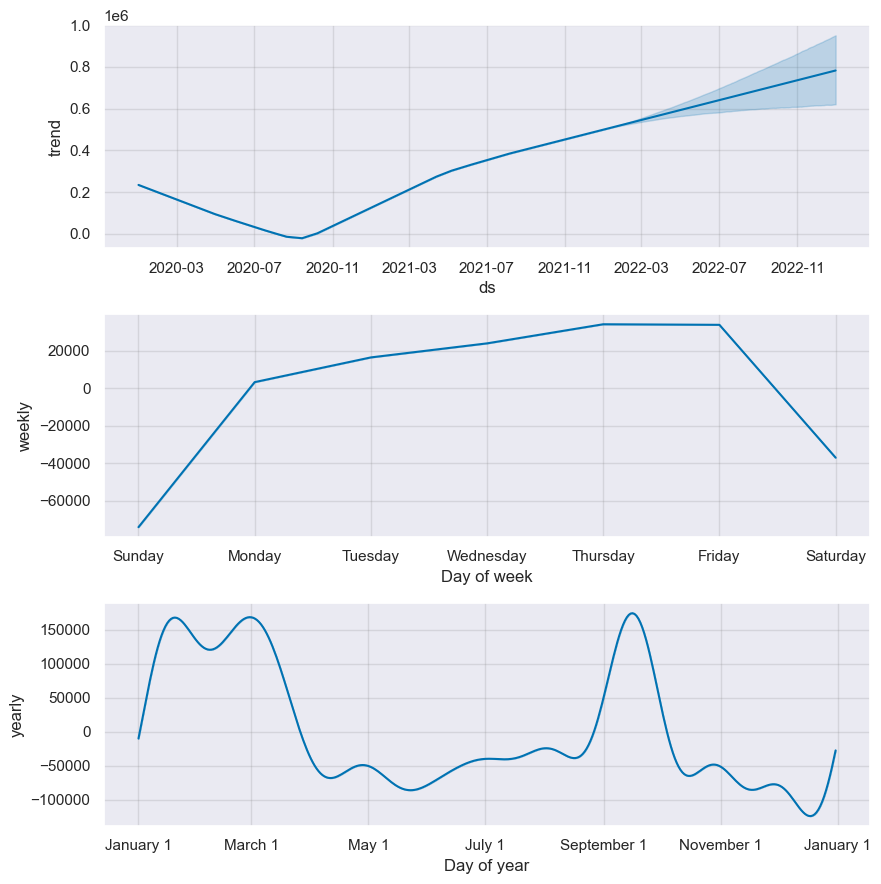

In [67]:
fig2 = m.plot_components(forecast)

* We can clearly see the drop of cars during March 2020, this can be related to Covid 19 that stoped the traffic completly
* Regarding the weekly analysis we see how the number of cars going through the 'peaje' increases during the week day
* Overall the forcasts indicates an increase on the number of vehicles circulating through the peajes.